# Imports

In [34]:
import pandas as pd

from data_works.general import get_df_from_file

# data collection

In [16]:
DIR_PATH = "performance_data/benchmark_torch/torch/torch"
sizes = ['large_v1', 'medium_v1', 'small_v1']
priorities = [-15, 0, 15]
devices = ['cuda', 'cpu']

def read_data(sizes, priorities, devices):
    data_dict = {}
    for size in sizes:
        for priority in priorities:
            for device in devices:
                data_dict[f'{device}_{priority}_{size}'] = {
                    'bet': get_df_from_file(DIR_PATH + f'/{device}_{priority}_{size}/batch_exec_times.csv'),
                    'ptv': get_df_from_file(DIR_PATH + f'/{device}_{priority}_{size}/batch_exec_times.csv'),
                }
    return data_dict

In [17]:
data_dict = read_data(sizes, priorities, devices)

In [69]:
device = 'cuda'
priority = '-15'
size = 'small_v1'
x = data_dict[f'{device}_{priority}_{size}']['ptv']
priority_compare_df = pd.DataFrame({
    '-15': data_dict[f'{device}_{"-15"}_{size}']['ptv']['batch_time'],
    '0': data_dict[f'{device}_{"0"}_{size}']['ptv']['batch_time'],
    '15': data_dict[f'{device}_{"15"}_{size}']['ptv']['batch_time'],
})

In [70]:
priority_compare_df

,-15,0,15
0,0.260022,0.335742,0.574867
1,0.139392,0.884813,0.141479
2,0.018309,0.133873,0.178628
3,0.015849,0.189409,0.119908
4,0.229376,0.162917,0.116019
...,...,...,...
4995,0.017431,0.019419,0.032466
4996,0.014848,0.150086,0.113389
4997,0.016900,0.028639,0.038363
4998,0.021123,0.062217,0.128371


<AxesSubplot:>

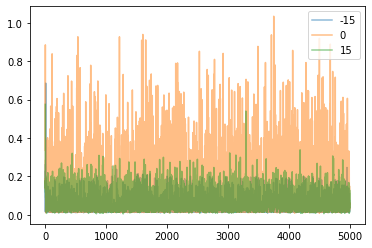

In [71]:
priority_compare_df.plot(alpha=0.5)

In [72]:
priority_compare_df['batch_time'].plot.hist(bins=50, alpha=0.5)

KeyError: 'batch_time'

In [37]:
pd.DataFrame([x.batch_time]).plot_hist()

AttributeError: 'DataFrame' object has no attribute 'plot_hist'

In [35]:
type(x.batch_time)

pandas.core.series.Series

In [36]:
type(pd.DataFrame([x.batch_time]))

pandas.core.frame.DataFrame